Voting
First -- First Place Votes
Totals
G -- Games
Per Game
MP -- Minutes Played Per Game
PTS -- Points Per Game
TRB -- Total Rebounds Per Game
AST -- Assists Per Game
STL -- Steals Per Game
BLK -- Blocks Per Game
Shooting
FG% -- Field Goal Percentage
3P% -- 3-Point Field Goal Percentage
FT% -- Free Throw Percentage
Advanced
WS -- Win Shares
An estimate of the number of wins contributed by a player.
WS/48 -- Win Shares Per 48 Minutes
An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\marta\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
# read the winner players other season that it will use for training model

mvp_win_train = pd.read_csv('Data/MVP Winners.csv', sep=';',header=0)

In [15]:
#Reffill datas NAN to 0
mvp_win_train.fillna(0, inplace=True) 

In [16]:
mvp_win_train.sample(50)

,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
46,1981-82,Ray Williams,0.536585,0.0,6.0,690.0,0.009,82.0,33.3,20.4,4.0,6.0,2.4,0.5,0.462,0.167,0.832,7.9,0.139
338,1997-98,Rik Smits,0.707317,0.0,2.0,1160.0,0.002,73.0,28.6,16.7,6.9,1.4,0.5,1.2,0.495,0.000,0.783,6.1,0.141
283,1994-95,Clyde Drexler,0.500000,0.0,3.0,1050.0,0.003,76.0,35.9,21.8,6.3,4.8,1.8,0.6,0.461,0.360,0.824,11.7,0.206
360,1998-99,Steve Smith,0.620000,0.0,1.0,1180.0,0.001,36.0,36.5,18.7,4.2,3.3,1.0,0.3,0.402,0.338,0.849,4.4,0.162
523,2009-10,Deron Williams,0.646341,0.0,7.0,1230.0,0.006,76.0,36.9,18.7,4.0,10.5,1.3,0.2,0.469,0.371,0.801,10.3,0.177
102,1984-85,Isiah Thomas,0.560976,0.0,63.0,780.0,0.081,81.0,38.1,21.2,4.5,13.9,2.3,0.3,0.458,0.257,0.809,11.2,0.173
500,2007-08,Antawn Jamison,0.524390,0.0,1.0,1260.0,0.001,79.0,38.7,21.4,10.2,1.5,1.3,0.4,0.436,0.339,0.760,9.2,0.144
501,2007-08,Paul Pierce,0.804878,0.0,1.0,1260.0,0.001,80.0,35.9,19.6,5.1,4.5,1.3,0.5,0.464,0.392,0.843,12.4,0.207
480,2006-07,Shaquille O'Neal,0.536585,0.0,3.0,1290.0,0.002,40.0,28.4,17.3,7.4,2.0,0.2,1.4,0.591,0.000,0.422,2.8,0.119
565,2012-13,James Harden,0.548780,0.0,33.0,1210.0,0.027,78.0,38.3,25.9,4.9,5.8,1.8,0.5,0.438,0.368,0.851,12.8,0.206


In [17]:
#Analyze the basics stadistics
mvp_win_train.describe()

,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.619196,6.400616,166.371186,1039.383667,0.156200,74.996918,36.329738,22.003852,7.459014,5.002003,1.427735,0.981664,0.494359,0.257590,0.780200,10.697227,0.187664
std,0.136740,20.260660,284.687084,206.787425,0.257948,9.327048,3.035173,5.170927,3.293852,2.832676,0.584946,0.928818,0.045544,0.153609,0.087698,3.365836,0.048555
min,0.000000,0.000000,1.000000,690.000000,0.001000,17.000000,23.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000
25%,0.548780,0.000000,3.000000,800.000000,0.004000,73.000000,34.600000,18.800000,4.800000,2.800000,1.000000,0.300000,0.463000,0.167000,0.737000,8.500000,0.155000
50%,0.646341,0.000000,23.000000,1130.000000,0.021000,79.000000,36.700000,22.000000,6.900000,4.300000,1.400000,0.600000,0.492000,0.302000,0.790000,10.600000,0.187000
75%,0.696970,1.000000,184.000000,1230.000000,0.177000,81.000000,38.300000,25.700000,10.400000,6.700000,1.800000,1.400000,0.523000,0.365000,0.843000,12.900000,0.218000
max,0.890244,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,37.100000,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000


In [33]:
mvp_win_train.columns

Index(['season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48'],
      dtype='object')

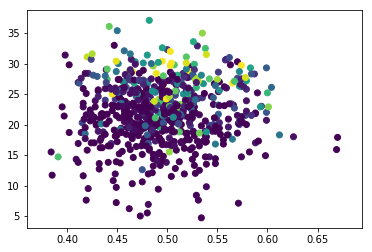

In [27]:
plt.scatter(mvp_win_train["fg_pct"],mvp_win_train["pts_per_g"],c=mvp_win_train["award_share"]);

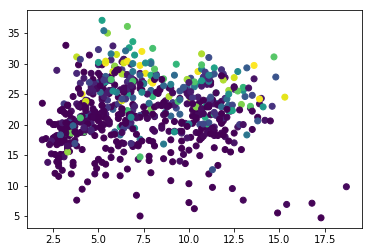

In [28]:
plt.scatter(mvp_win_train["trb_per_g"],mvp_win_train["pts_per_g"],c=mvp_win_train["award_share"]);

In [34]:
X = mvp_win_train[['g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48']].values
y = mvp_win_train["award_share"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)